#CSE 5526 Lab3
## Author: Xuecheng Liu

This is will be breif summary of this lab, you can refer to the code below and adjust parameters to test out.

Generally speaking, as we increase the learning rate, we get a lower mean absolute error. However, this error will converge as we keep increase the learning rate. <br>
Also, when we increase the number of epochs during the constrastive divergence estimation phase, the error will go down and converge around certain value.<br>
For the second part, I adjust the number of hidden units and generally speaking, as we increase the number of hidden units, we are getting a lower mean absolute error. For example,Mean absolute error with 0.01 lr and 4 hidden units is 6.24 and Mean absolute error with 0.01 lr and 6 hidden units is 5.56.
<br>
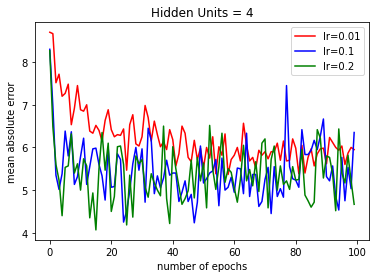 <br>
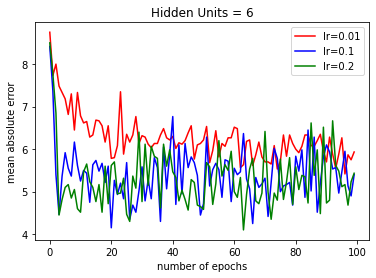

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.mean(mae[0,:]) # for testing purpose

5.560499999999999

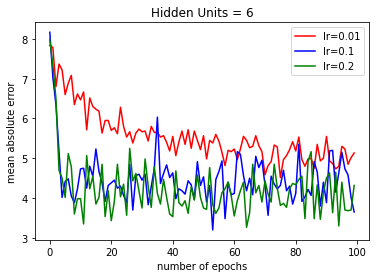

In [73]:
# load data
ice_cream_df = pd.read_csv('./icecream.csv', sep=',', header=None)

# convert data to [-1,1] domain
ice_cream = ice_cream_df.to_numpy()
ice_cream = ice_cream * 2 - 1

num_hidden_units = 6   # change this for number of hidden units for part 2
iter_num = 6  # change this for number of iterations in contrastive divergence estimation for part 1

# max number of epochs
num_epochs = range(100)


# train the RBM with different learning rates
learning_rates = [0.01, 0.1, 0.2]
mae = np.zeros((len(learning_rates), len(num_epochs)))  # absolute mean error

for i, learning_rate in enumerate(learning_rates):
    for j, epochs in enumerate(num_epochs):
        rbm = RBM(num_V=10, num_hidden_units=num_hidden_units)
        rbm.train(ice_cream, learning_rate=learning_rate, epoch_num=epochs, iter_num=iter_num)
        predictions = rbm.predict(ice_cream)
        mae[i, j] = rbm.mean_absolute_error(ice_cream, predictions)

# plot result
plt.plot(num_epochs, mae[0, :], color='red', label=f'lr={ learning_rates[0] }')
plt.plot(num_epochs, mae[1, :], color='blue', label=f'lr={ learning_rates[1] }')
plt.plot(num_epochs, mae[2, :], color='green',  label=f'lr={ learning_rates[2] }')
plt.title('Hidden Units = 6')
plt.xlabel('number of epochs')
plt.ylabel('mean absolute error')
plt.legend()
plt.show()




In [44]:
def sample(x):
    return np.sign(x - np.random.uniform(0, 1, (x.shape[0], x.shape[1])))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class RBM():
    def __init__(self, num_V=1, num_hidden_units=1):
      
        self.weights = np.random.rand(num_V, num_hidden_units)

    def predict(self, features, num_hidden_units=4):
        if num_hidden_units:
            hidden = sample(sigmoid(np.dot(self.weights.T, features.T)))
            predictions = sample(sigmoid(np.dot(self.weights, hidden))).T
        else:
            bias = np.random.uniform(-1,1, size=(4,12)).reshape(4,12)
            hidden = sample(sigmoid(np.dot(self.weights.T, features.T))) + bias
            predictions = sample(sigmoid(np.dot(self.weights, hidden))).T
        return predictions

    def mean_absolute_error(self, features, predictions):
        return np.sum(np.absolute(predictions - features)) / features.shape[0]

    def train(self, v, learning_rate=0.1, epoch_num=10, iter_num=0):
        for epoch in range(epoch_num):
            H0 = sample(sigmoid(np.dot(self.weights.T, v.T)))
            V1 = sample(sigmoid(np.dot(self.weights, H0)))
            H1 = sample(sigmoid(np.dot(self.weights.T, V1)))
            if iter_num:
                self.weights += learning_rate * (np.dot(v.T, H0.T) - np.dot(np.power(V1, 3), np.power(H1.T, 3)))
            else:
                self.weights += learning_rate * (np.dot(v.T, H0.T) - np.dot(V1, H1.T))
